# Classification after Clustering with Agglomerative Clustering
### Import CSV and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"data/clustered_data.csv")
# Print shape of dataset
print(df.shape)

(2240, 22)


## Split X and y

### Why do we split our data?
- Training Dataset is the part of Original Dataset that we use to train our ML model. The model learns on this data by running the algorithm and maps a function F(x) where “x” in the independent variable (inputs) for “y” where “y” is the dependent variable(output).

In [3]:
X = df.drop("cluster", axis=1) #dropping the target column which is 'cluster'
y = df["cluster"]

## Grid Search
### Why do we use Grid Search?
- GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

### Select The Best Model

so here we have some list of the best classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
#
from sklearn import metrics 

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

### **We will create a generic function to check each model's performance so that we can compare those**

In [4]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    

    models_list = []
    scores = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test,y_pred)
        
        model_name = list(models.keys())[i]
        print(f'---- score for --- {model_name} ----')
        print(f"{score}")
        models_list.append(model_name)
        scores.append(score)
    
    print()
    
    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores        
    return report

In [5]:
report = evaluate_models(X, y, models)

---- score for --- Random Forest ----
0.96875
---- score for --- Decision Tree ----
0.9508928571428571
---- score for --- Gradient Boosting ----
0.9642857142857143
---- score for --- Logistic Regression ----
0.8794642857142857
---- score for --- K-Neighbors Classifier ----
0.8102678571428571
---- score for --- XGBClassifier ----
0.9665178571428571
---- score for --- AdaBoost Classifier ----
0.9441964285714286



In [6]:
report.sort_values('Score')

,Model_name,Score
4,K-Neighbors Classifier,0.810268
3,Logistic Regression,0.879464
6,AdaBoost Classifier,0.944196
1,Decision Tree,0.950893
2,Gradient Boosting,0.964286
5,XGBClassifier,0.966518
0,Random Forest,0.968750


**From the report above we can see that the XGB Classifier performed the best, so we will continue training our model using XGB Classifier algorithm**

In [7]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
994,68,2,0,1,2,64587.0,108.0,4196.0,49,66,0,16,0.0,6,20.0,1,1,4,2,0,3
2162,65,2,1,1,1,47320.0,414.0,4521.0,10,200,19,111,50.0,15,19.0,5,1,8,6,0,6
906,61,2,0,0,0,86429.0,1449.0,4409.0,10,464,28,556,29.0,18,37.0,7,4,7,0,1,2
572,44,1,0,1,1,38593.0,177.0,4478.0,42,51,12,49,17.0,24,24.0,4,1,3,3,0,8
1877,64,2,1,0,0,72905.0,1515.0,4348.0,52,407,81,445,120.5,81,126.5,3,7,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,53,2,1,1,2,44078.0,41.0,4199.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,43,2,0,1,1,61825.0,424.0,4515.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,71,3,1,1,1,67381.0,957.0,4719.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,59,4,0,1,2,48918.0,62.0,4267.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


**“Hyperparameters were selected using heuristic tuning based on XGBoost best practices.”**

In [ ]:
#we get this
best_xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)


In [ ]:
best_model = best_xgb_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("XGB Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGB Classifier
Accuracy Score value: 0.9673
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       259
           1       0.94      0.97      0.96       234
           2       0.97      0.96      0.96       179

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



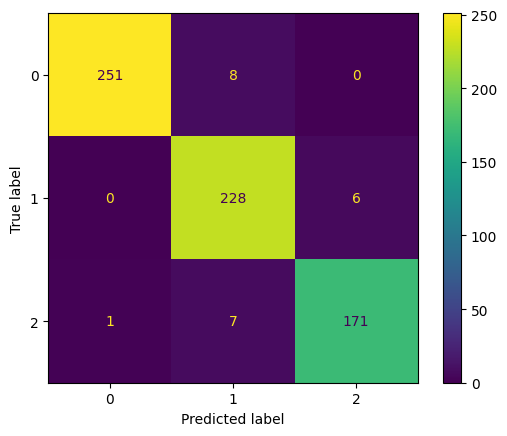

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [12]:
import joblib

joblib.dump(best_model, "data/model/xgb_model.pkl")

['data/model/xgb_model.pkl']